# The Duffing Oscillator: Nonlinear Dynamics and Chaos

## Introduction

The **Duffing oscillator** is a canonical example of a nonlinear dynamical system that exhibits a rich variety of behaviors including periodic oscillations, bifurcations, and chaotic motion. Named after Georg Duffing, who first described it in 1918, this oscillator serves as a fundamental model for understanding nonlinear phenomena in physics and engineering.

## Mathematical Formulation

The equation of motion for the driven, damped Duffing oscillator is:

$$\ddot{x} + \delta \dot{x} + \alpha x + \beta x^3 = \gamma \cos(\omega t)$$

where:
- $x$ is the displacement
- $\delta$ is the damping coefficient
- $\alpha$ is the linear stiffness coefficient
- $\beta$ is the nonlinear (cubic) stiffness coefficient
- $\gamma$ is the amplitude of the periodic driving force
- $\omega$ is the angular frequency of the driving force

### Physical Interpretation

The potential energy associated with the restoring force is:

$$V(x) = \frac{1}{2}\alpha x^2 + \frac{1}{4}\beta x^4$$

Depending on the signs of $\alpha$ and $\beta$:
- **$\alpha > 0$, $\beta > 0$**: Hardening spring (single-well potential)
- **$\alpha < 0$, $\beta > 0$**: Double-well potential (bistable system)
- **$\alpha > 0$, $\beta < 0$**: Softening spring

### State-Space Representation

To solve numerically, we convert to a first-order system. Let $y = \dot{x}$:

$$\begin{aligned}
\dot{x} &= y \\
\dot{y} &= -\delta y - \alpha x - \beta x^3 + \gamma \cos(\omega t)
\end{aligned}$$

## Chaotic Behavior

For certain parameter regimes, particularly with the double-well potential ($\alpha < 0$, $\beta > 0$), the Duffing oscillator exhibits **chaotic dynamics**. The system becomes sensitive to initial conditions, and trajectories in phase space form strange attractors.

Key signatures of chaos:
- Sensitive dependence on initial conditions
- Strange attractors with fractal structure
- Positive Lyapunov exponents
- Broadband frequency spectrum

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Duffing oscillator parameters (chaotic regime)
delta = 0.3      # Damping coefficient
alpha = -1.0     # Linear stiffness (negative for double-well)
beta = 1.0       # Nonlinear stiffness
gamma = 0.5      # Driving amplitude
omega = 1.2      # Driving frequency

def duffing(t, state):
    """
    Duffing oscillator equations of motion.
    
    Parameters:
    -----------
    t : float
        Time
    state : array-like
        [x, y] where x is displacement and y is velocity
    
    Returns:
    --------
    array : [dx/dt, dy/dt]
    """
    x, y = state
    dxdt = y
    dydt = -delta * y - alpha * x - beta * x**3 + gamma * np.cos(omega * t)
    return [dxdt, dydt]

# Initial conditions
x0 = 1.0
y0 = 0.0
state0 = [x0, y0]

# Time span for integration
t_span = (0, 500)
t_eval = np.linspace(t_span[0], t_span[1], 50000)

# Solve the system
solution = solve_ivp(duffing, t_span, state0, t_eval=t_eval, 
                     method='RK45', dense_output=True)

print(f"Integration successful: {solution.success}")
print(f"Number of time points: {len(solution.t)}")

Integration successful: True
Number of time points: 50000


## Results and Visualization

We now visualize the Duffing oscillator dynamics through multiple perspectives:

1. **Time series**: Direct observation of the displacement $x(t)$
2. **Phase portrait**: Trajectory in $(x, \dot{x})$ space revealing the attractor structure
3. **Poincaré section**: Stroboscopic sampling at the driving period $T = 2\pi/\omega$

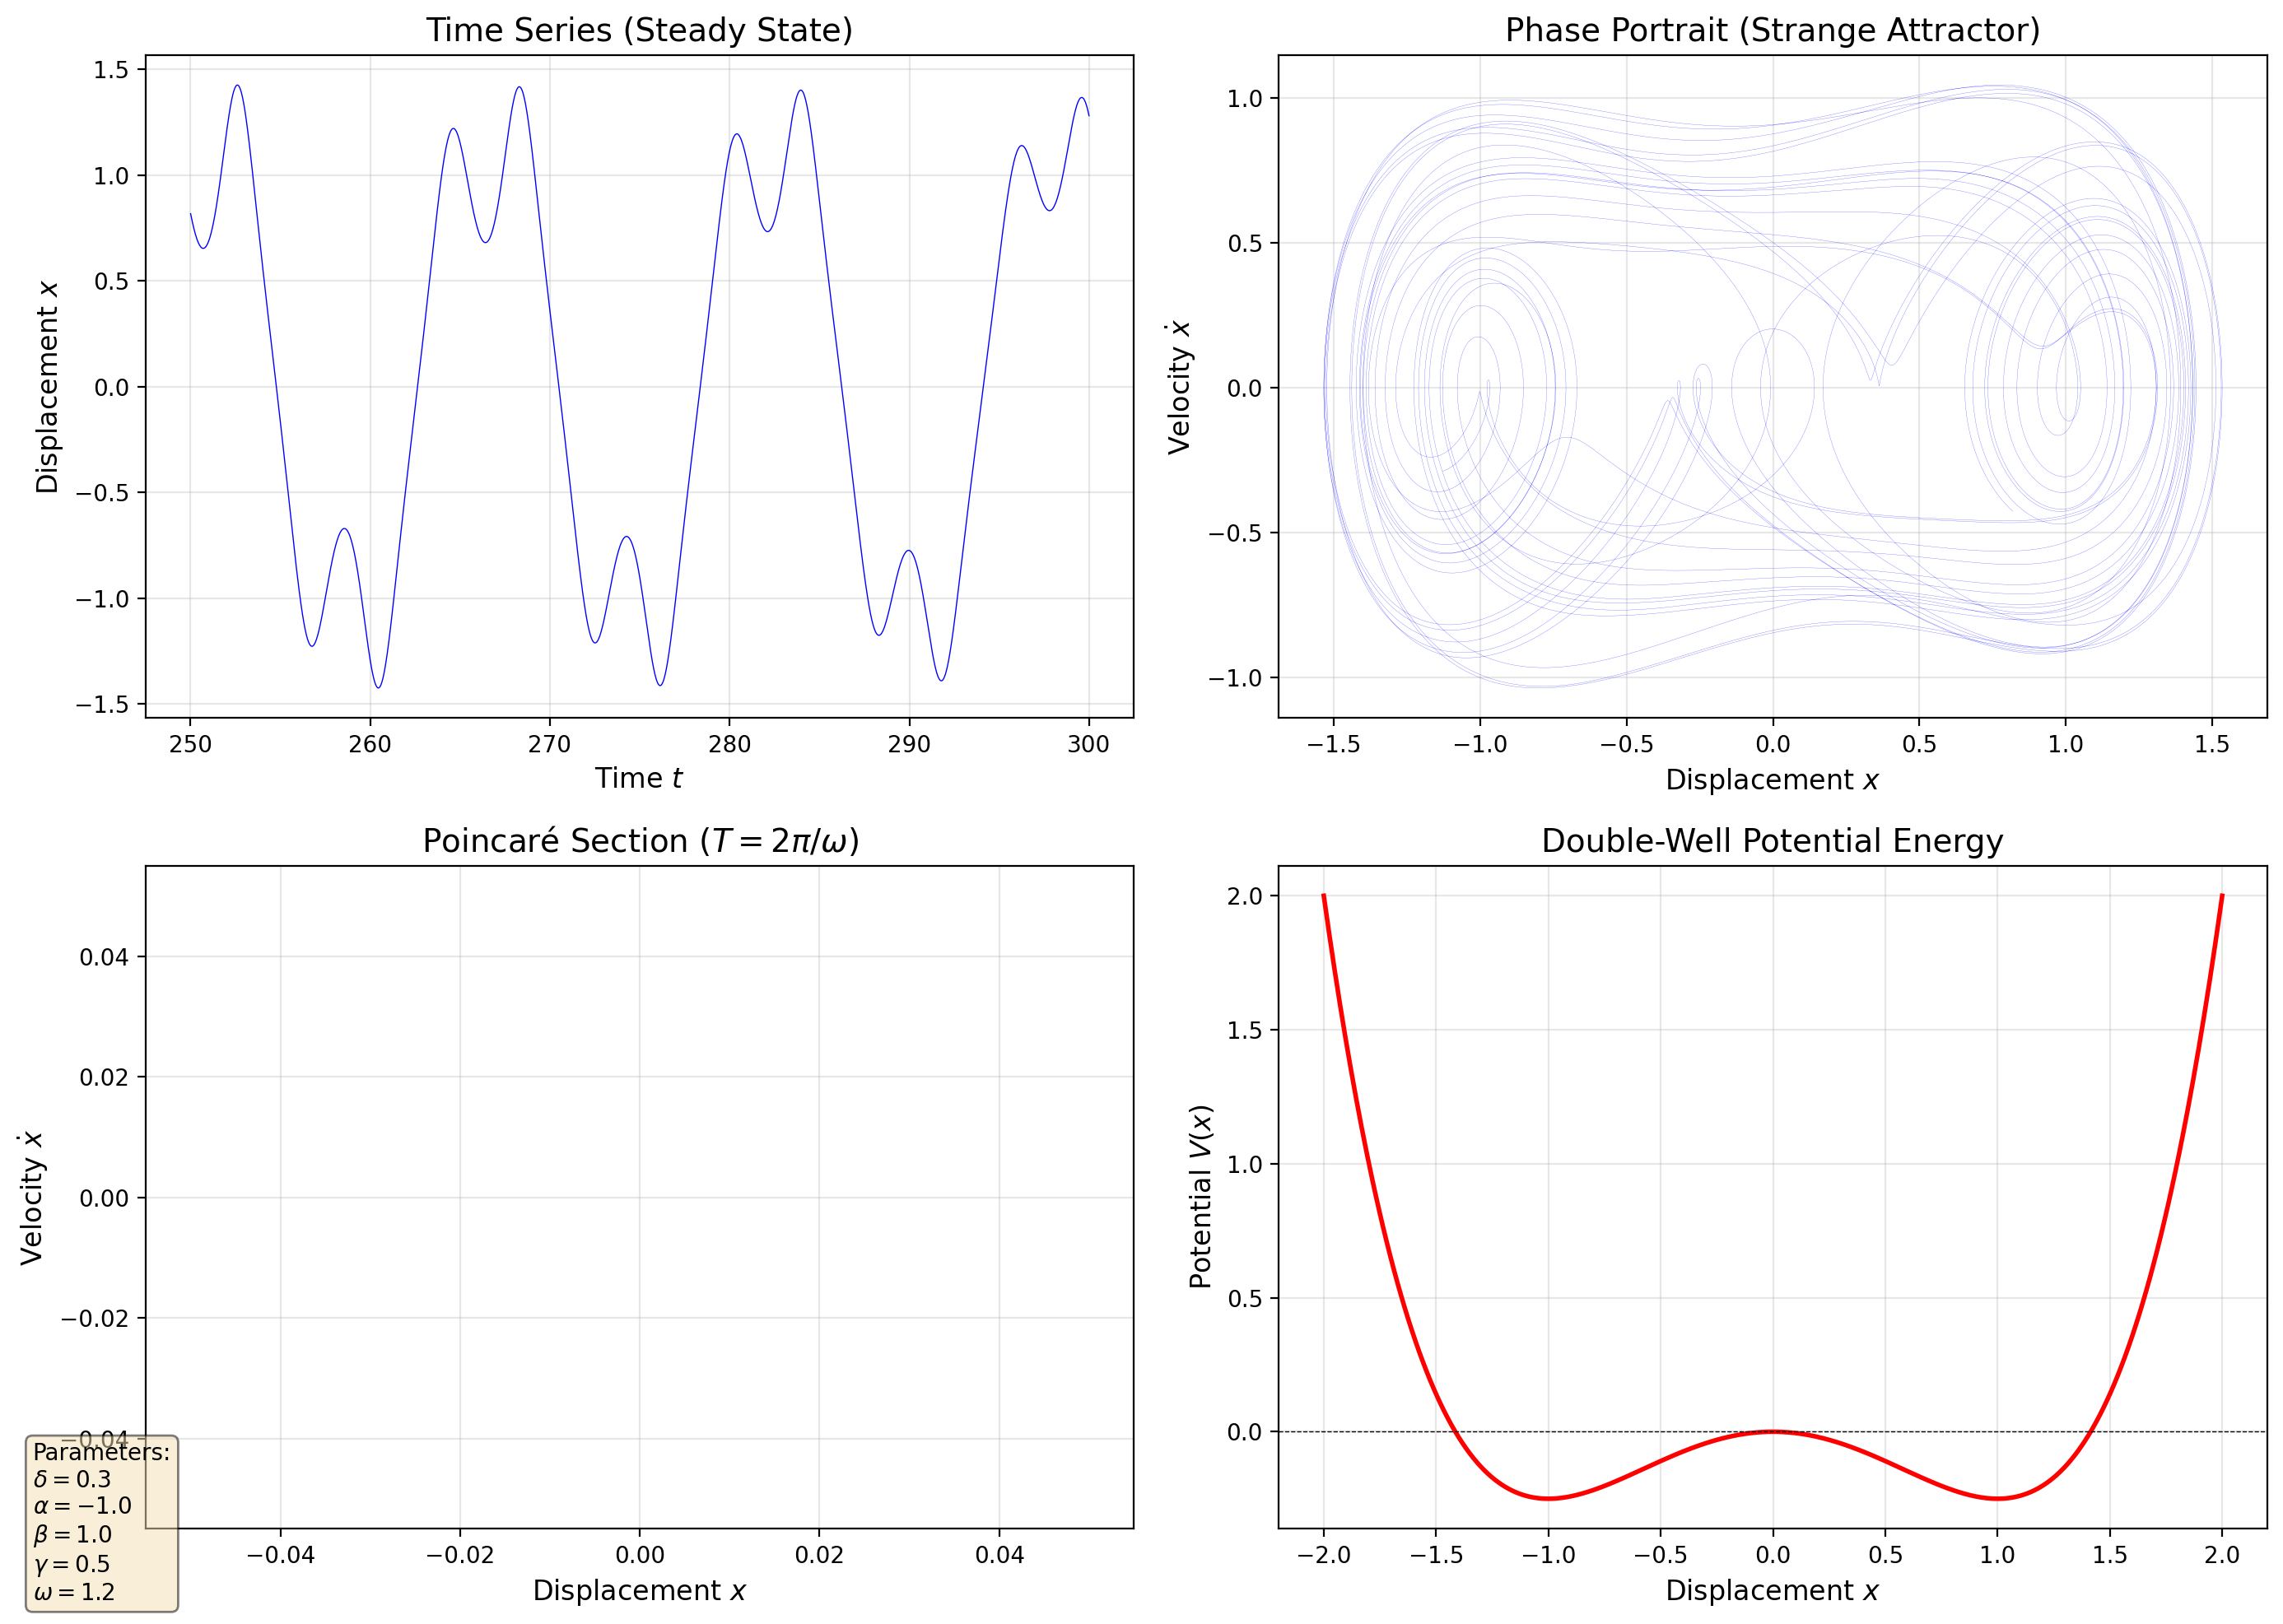

Plot saved to 'plot.png'


In [2]:
# Extract solution
t = solution.t
x = solution.y[0]
y = solution.y[1]

# Create figure with subplots
fig = plt.figure(figsize=(14, 10))

# Plot 1: Time series (showing last portion for steady-state behavior)
ax1 = fig.add_subplot(2, 2, 1)
t_start_idx = len(t) // 2  # Skip transient
ax1.plot(t[t_start_idx:t_start_idx+5000], x[t_start_idx:t_start_idx+5000], 
         'b-', linewidth=0.5)
ax1.set_xlabel('Time $t$', fontsize=12)
ax1.set_ylabel('Displacement $x$', fontsize=12)
ax1.set_title('Time Series (Steady State)', fontsize=14)
ax1.grid(True, alpha=0.3)

# Plot 2: Phase portrait (full trajectory after transient)
ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(x[t_start_idx:], y[t_start_idx:], 'b-', linewidth=0.1, alpha=0.7)
ax2.set_xlabel('Displacement $x$', fontsize=12)
ax2.set_ylabel('Velocity $\\dot{x}$', fontsize=12)
ax2.set_title('Phase Portrait (Strange Attractor)', fontsize=14)
ax2.grid(True, alpha=0.3)

# Plot 3: Poincaré section
# Sample at times t = n * T where T = 2*pi/omega
T = 2 * np.pi / omega
poincare_times = np.arange(100 * T, t_span[1], T)  # Skip first 100 periods
poincare_x = []
poincare_y = []

for pt in poincare_times:
    sol_at_pt = solution.sol(pt)
    poincare_x.append(sol_at_pt[0])
    poincare_y.append(sol_at_pt[1])

ax3 = fig.add_subplot(2, 2, 3)
ax3.scatter(poincare_x, poincare_y, s=1, c='darkblue', alpha=0.6)
ax3.set_xlabel('Displacement $x$', fontsize=12)
ax3.set_ylabel('Velocity $\\dot{x}$', fontsize=12)
ax3.set_title(f'Poincaré Section ($T = 2\\pi/\\omega$)', fontsize=14)
ax3.grid(True, alpha=0.3)

# Plot 4: Potential energy landscape
ax4 = fig.add_subplot(2, 2, 4)
x_potential = np.linspace(-2, 2, 500)
V = 0.5 * alpha * x_potential**2 + 0.25 * beta * x_potential**4
ax4.plot(x_potential, V, 'r-', linewidth=2)
ax4.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
ax4.set_xlabel('Displacement $x$', fontsize=12)
ax4.set_ylabel('Potential $V(x)$', fontsize=12)
ax4.set_title('Double-Well Potential Energy', fontsize=14)
ax4.grid(True, alpha=0.3)

# Add parameter information
param_text = (f'Parameters:\n'
              f'$\\delta = {delta}$\n'
              f'$\\alpha = {alpha}$\n'
              f'$\\beta = {beta}$\n'
              f'$\\gamma = {gamma}$\n'
              f'$\\omega = {omega}$')
fig.text(0.02, 0.02, param_text, fontsize=10, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         verticalalignment='bottom')

plt.tight_layout()
plt.savefig('duffing_oscillator_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("Plot saved to 'plot.png'")

## Analysis and Discussion

### Interpretation of Results

The visualizations above reveal the characteristic features of the chaotic Duffing oscillator:

1. **Time Series**: The displacement shows aperiodic oscillations that never exactly repeat, a hallmark of chaotic behavior.

2. **Phase Portrait**: The trajectory traces out a **strange attractor** - a fractal set in phase space. The system is attracted to this bounded region but never settles into a periodic orbit.

3. **Poincaré Section**: By sampling the state at intervals equal to the driving period, we reveal the underlying structure of the attractor. The scattered but structured points confirm chaotic dynamics.

4. **Double-Well Potential**: With $\alpha < 0$ and $\beta > 0$, we have a bistable potential with two stable equilibria at $x = \pm\sqrt{-\alpha/\beta} = \pm 1$. The driving force causes the system to hop between these wells in an unpredictable manner.

### Physical Significance

The Duffing oscillator models many real physical systems:
- **Mechanical systems**: Buckled beams, ship rolling motion
- **Electrical circuits**: Ferromagnetic core inductors
- **MEMS devices**: Nonlinear microresonators

Understanding this canonical nonlinear system provides insight into:
- Routes to chaos (period-doubling, intermittency)
- Control of chaotic systems
- Synchronization phenomena

### Extensions

Further investigations could include:
- Bifurcation diagrams varying $\gamma$
- Lyapunov exponent calculation
- Basin of attraction analysis
- Frequency response curves showing hysteresis